-  https://github.com/lmoroney

In [1]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [3]:
local_zip = 'kagglecatsanddogs_5340.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))

12501
12501


In [5]:
# Use os.mkdir to create directories for training and Testing

try:
    os.mkdir('/tmp/cats-v-dogs')
    os.mkdir('/tmp/cats-v-dogs/training')
    os.mkdir('/tmp/cats-v-dogs/testing')
    os.mkdir('/tmp/cats-v-dogs/training/cats')
    os.mkdir('/tmp/cats-v-dogs/training/dogs')
    os.mkdir('/tmp/cats-v-dogs/testing/cats')
    os.mkdir('/tmp/cats-v-dogs/testing/dogs')
except OSError:
    pass

In [6]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)



In [7]:
CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# Expected output
# 666.jpg is zero length, so ignoring
# 11702.jpg is zero length, so ignoring
print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))

# Expected output:
# 11250
# 11250
# 1250
# 1250

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.
11250
11250
1250
1250


In [16]:
# DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)), # parameter = 16*(9 x 3 + 1) = 448
    tf.keras.layers.MaxPooling2D(2, 2),   # resulting image = 74x74 x 16
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'), # parameter = (16 fm x 9 + 1) * 32 = 145 x 32 = 4640
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ### END CODE HERE
])


In [17]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 64)      

In [18]:
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
TRAINING_DIR = "/tmp/cats-v-dogs/training/" #YOUR CODE HERE
train_datagen = ImageDataGenerator(rescale=1.0/255.) #YOUR CODE HERE
train_generator = train_datagen.flow_from_directory(TRAINING_DIR, #YOUR CODE HERE
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = "/tmp/cats-v-dogs/testing/" #YOUR CODE HERE
validation_datagen = ImageDataGenerator(rescale=1.0/255.) #YOUR CODE HERE
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, #YOUR CODE HERE
                                                              batch_size=100,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [24]:
# Note that this may take some time.
history = model.fit(train_generator,
                              epochs=2,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/2
 74/225 [========>.....................] - ETA: 2:54 - loss: 0.5223 - accuracy: 0.7330

C:\Users\I336615\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:819: UserWarning: Truncated File Read
  warnings.warn(str(msg))


225/225 [==============================] - 293s 1s/step - loss: 0.5032 - accuracy: 0.7538 - val_loss: 0.4625 - val_accuracy: 0.7752
Epoch 2/2
225/225 [==============================] - 439s 2s/step - loss: 0.4368 - accuracy: 0.8004 - val_loss: 0.4210 - val_accuracy: 0.8068


<Figure size 432x288 with 0 Axes>

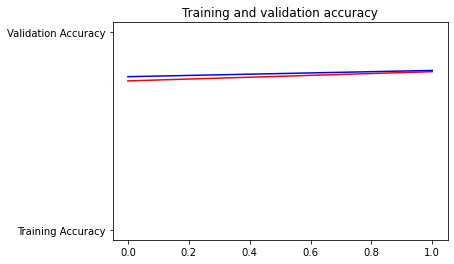

<Figure size 432x288 with 0 Axes>

In [25]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

In [26]:
TRAINING_DIR = "/tmp/cats-v-dogs/training/"
# Experiment with your own parameters here to really try to drive it to 99.9% accuracy or better
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = "/tmp/cats-v-dogs/testing/"
# Experiment with your own parameters here to really try to drive it to 99.9% accuracy or better
validation_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [27]:
# fit the model using image augmentation now >>
history = model.fit(train_generator,
                              epochs=2,
                              verbose=1,
                              validation_data=validation_generator)


Epoch 1/2
225/225 [==============================] - 462s 2s/step - loss: 0.5571 - accuracy: 0.7167 - val_loss: 0.5679 - val_accuracy: 0.7076
Epoch 2/2
225/225 [==============================] - 458s 2s/step - loss: 0.5352 - accuracy: 0.7313 - val_loss: 0.5016 - val_accuracy: 0.7408


<Figure size 432x288 with 0 Axes>

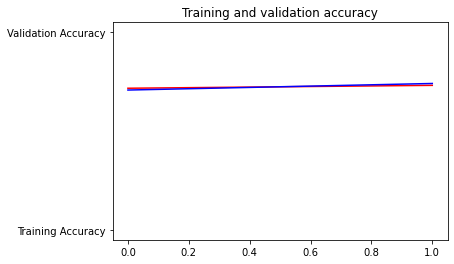

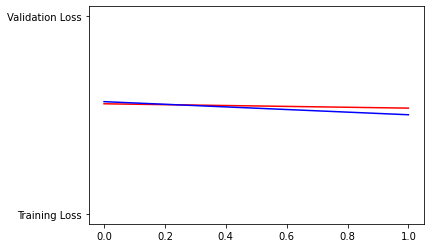

<Figure size 432x288 with 0 Axes>

In [29]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()

### Applying Callback

In [31]:
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('accuracy') is not None and logs.get('accuracy') > 0.75:
                print("\nReached 75% accuracy so cancelling training!")
                self.model.stop_training = True

In [33]:
# fit the model using callback >>
callbacks = myCallback()
history = model.fit(train_generator,
                              epochs=10,
                              verbose=1,
                              validation_data=validation_generator, callbacks=[callbacks])


Epoch 1/10
225/225 [==============================] - ETA: 0s - loss: 0.4972 - accuracy: 0.7572
Reached 75% accuracy so cancelling training!
225/225 [==============================] - 410s 2s/step - loss: 0.4972 - accuracy: 0.7572 - val_loss: 0.4744 - val_accuracy: 0.7756


### Transfer Learning

In [35]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
    
# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

--2022-12-10 14:53:27--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.42.16, 142.251.42.48, 142.251.42.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.42.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

     0K .......... .......... .......... .......... ..........  0%  196K 7m19s
    50K .......... .......... .......... .......... ..........  0% 40.5M 3m40s
   100K .......... .......... .......... .......... ..........  0%  504K 3m23s
   150K .......... .......... .......... .......... ..........  0%  300K 3m44s
   200K .......... .......... .......... .......... ..........  0% 18.2M 3m0s
   250K .......... .......... .......... .......... ..........  0% 13.4M 2m31s
   300K .......... .........

 13450K .......... .......... .......... .......... .......... 15% 65.5K 12m39s
 13500K .......... .......... .......... .......... .......... 15% 54.8K 12m40s
 13550K .......... .......... .......... .......... .......... 15%  101K 12m39s
 13600K .......... .......... .......... .......... .......... 15% 53.2K 12m41s
 13650K .......... .......... .......... .......... .......... 15% 73.1K 12m41s
 13700K .......... .......... .......... .......... .......... 16% 45.9K 12m44s
 13750K .......... .......... .......... .......... .......... 16% 80.0K 12m44s
 13800K .......... .......... .......... .......... .......... 16% 51.0K 12m46s
 13850K .......... .......... .......... .......... .......... 16%  121K 12m44s
 13900K .......... .......... .......... .......... .......... 16% 67.3K 12m45s
 13950K .......... .......... .......... .......... .......... 16%  107K 12m44s
 14000K .......... .......... .......... .......... .......... 16% 68.3K 12m45s
 14050K .......... .......... ..........

 27850K .......... .......... .......... .......... .......... 32% 88.9K 17m44s
 27900K .......... .......... .......... .......... .......... 32% 80.1K 17m43s
 27950K .......... .......... .......... .......... .......... 32% 76.4K 17m41s
 28000K .......... .......... .......... .......... .......... 32% 79.1K 17m40s
 28050K .......... .......... .......... .......... .......... 32% 69.9K 17m38s
 28100K .......... .......... .......... .......... .......... 32% 67.6K 17m37s
 28150K .......... .......... .......... .......... .......... 32% 50.3K 17m36s
 28200K .......... .......... .......... .......... .......... 32% 64.5K 17m35s
 28250K .......... .......... .......... .......... .......... 32% 55.0K 17m34s
 28300K .......... .......... .......... .......... .......... 33% 69.9K 17m33s
 28350K .......... .......... .......... .......... .......... 33% 66.8K 17m32s
 28400K .......... .......... .......... .......... .......... 33% 50.8K 17m31s
 28450K .......... .......... ..........

 41150K .......... .......... .......... .......... .......... 47%  119K 11m30s
 41200K .......... .......... .......... .......... .......... 48%  185K 11m29s
 41250K .......... .......... .......... .......... .......... 48%  162K 11m27s
 41300K .......... .......... .......... .......... .......... 48%  139K 11m26s
 41350K .......... .......... .......... .......... .......... 48%  171K 11m25s
 41400K .......... .......... .......... .......... .......... 48%  112K 11m24s
 41450K .......... .......... .......... .......... .......... 48%  243K 11m22s
 41500K .......... .......... .......... .......... .......... 48%  144K 11m21s
 41550K .......... .......... .......... .......... .......... 48%  202K 11m20s
 41600K .......... .......... .......... .......... .......... 48%  167K 11m19s
 41650K .......... .......... .......... .......... .......... 48%  173K 11m17s
 41700K .......... .......... .......... .......... .......... 48%  191K 11m16s
 41750K .......... .......... ..........

 50600K .......... .......... .......... .......... .......... 58%  173K 7m51s
 50650K .......... .......... .......... .......... .......... 59% 1.37M 7m50s
 50700K .......... .......... .......... .......... .......... 59%  244K 7m49s
 50750K .......... .......... .......... .......... .......... 59%  489K 7m48s
 50800K .......... .......... .......... .......... .......... 59%  314K 7m47s
 50850K .......... .......... .......... .......... .......... 59%  428K 7m46s
 50900K .......... .......... .......... .......... .......... 59%  282K 7m45s
 50950K .......... .......... .......... .......... .......... 59%  280K 7m44s
 51000K .......... .......... .......... .......... .......... 59%  354K 7m43s
 51050K .......... .......... .......... .......... .......... 59%  248K 7m42s
 51100K .......... .......... .......... .......... .......... 59%  242K 7m41s
 51150K .......... .......... .......... .......... .......... 59%  214K 7m40s
 51200K .......... .......... .......... .......... 

 61950K .......... .......... .......... .......... .......... 72%  237K 5m11s
 62000K .......... .......... .......... .......... .......... 72%  157K 5m10s
 62050K .......... .......... .......... .......... .......... 72%  167K 5m9s
 62100K .......... .......... .......... .......... .......... 72%  159K 5m8s
 62150K .......... .......... .......... .......... .......... 72%  147K 5m8s
 62200K .......... .......... .......... .......... .......... 72%  214K 5m7s
 62250K .......... .......... .......... .......... .......... 72%  162K 5m6s
 62300K .......... .......... .......... .......... .......... 72%  185K 5m5s
 62350K .......... .......... .......... .......... .......... 72%  185K 5m4s
 62400K .......... .......... .......... .......... .......... 72%  110K 5m4s
 62450K .......... .......... .......... .......... .......... 72%  286K 5m3s
 62500K .......... .......... .......... .......... .......... 72%  212K 5m2s
 62550K .......... .......... .......... .......... ..........

 79050K .......... .......... .......... .......... .......... 92%  488K 74s
 79100K .......... .......... .......... .......... .......... 92%  712K 74s
 79150K .......... .......... .......... .......... .......... 92% 1.32M 73s
 79200K .......... .......... .......... .......... .......... 92%  227K 72s
 79250K .......... .......... .......... .......... .......... 92% 37.6M 72s
 79300K .......... .......... .......... .......... .......... 92%  681K 71s
 79350K .......... .......... .......... .......... .......... 92%  961K 71s
 79400K .......... .......... .......... .......... .......... 92%  267K 70s
 79450K .......... .......... .......... .......... .......... 92% 30.4M 69s
 79500K .......... .......... .......... .......... .......... 92% 3.27M 69s
 79550K .......... .......... .......... .......... .......... 92% 1.32M 68s
 79600K .......... .......... .......... .......... .......... 92%  324K 68s
 79650K .......... .......... .......... .......... .......... 92% 8.86M 67s

In [36]:
# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
    layer.trainable = False
  
# Print the model summary
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_109 (Conv2D)            (None, 74, 74, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 74, 74, 32)  96          ['conv2d_109[0][0]']             
 ormalization)                                                                                    
                                                                                       

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_104 (Batch  (None, 16, 16, 96)  288         ['conv2d_119[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_105 (Batch  (None, 16, 16, 32)  96          ['conv2d_120[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_99 (Activation)     (None, 16, 16, 64)   0           ['batch_normalization_99[0][0]'] 
                                                                                                  
 activatio

 activation_116 (Activation)    (None, 16, 16, 64)   0           ['batch_normalization_116[0][0]']
                                                                                                  
 conv2d_129 (Conv2D)            (None, 16, 16, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_132 (Conv2D)            (None, 16, 16, 96)   55296       ['activation_116[0][0]']         
                                                                                                  
 batch_normalization_114 (Batch  (None, 16, 16, 48)  144         ['conv2d_129[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_117 (Batch  (None, 16, 16, 96)  288         ['conv2d_132[0][0]']             
 Normaliza

 mixed3 (Concatenate)           (None, 7, 7, 768)    0           ['activation_120[0][0]',         
                                                                  'activation_123[0][0]',         
                                                                  'max_pooling2d_21[0][0]']       
                                                                                                  
 conv2d_143 (Conv2D)            (None, 7, 7, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_128 (Batch  (None, 7, 7, 128)   384         ['conv2d_143[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_128 (Activation)    (None, 7, 7, 128)    0           ['batch_normalization_128[0][0]']
          

                                                                                                  
 batch_normalization_138 (Batch  (None, 7, 7, 160)   480         ['conv2d_153[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_138 (Activation)    (None, 7, 7, 160)    0           ['batch_normalization_138[0][0]']
                                                                                                  
 conv2d_154 (Conv2D)            (None, 7, 7, 160)    179200      ['activation_138[0][0]']         
                                                                                                  
 batch_normalization_139 (Batch  (None, 7, 7, 160)   480         ['conv2d_154[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_164 (Conv2D)            (None, 7, 7, 160)    179200      ['activation_148[0][0]']         
                                                                                                  
 batch_normalization_149 (Batch  (None, 7, 7, 160)   480         ['conv2d_164[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_149 (Activation)    (None, 7, 7, 160)    0           ['batch_normalization_149[0][0]']
                                                                                                  
 conv2d_160 (Conv2D)            (None, 7, 7, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_16

                                                                                                  
 activation_159 (Activation)    (None, 7, 7, 192)    0           ['batch_normalization_159[0][0]']
                                                                                                  
 conv2d_170 (Conv2D)            (None, 7, 7, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_175 (Conv2D)            (None, 7, 7, 192)    258048      ['activation_159[0][0]']         
                                                                                                  
 batch_normalization_155 (Batch  (None, 7, 7, 192)   576         ['conv2d_170[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_nor

 conv2d_183 (Conv2D)            (None, 7, 7, 192)    258048      ['activation_167[0][0]']         
                                                                                                  
 batch_normalization_164 (Batch  (None, 7, 7, 192)   576         ['conv2d_179[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_168 (Batch  (None, 7, 7, 192)   576         ['conv2d_183[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_164 (Activation)    (None, 7, 7, 192)    0           ['batch_normalization_164[0][0]']
                                                                                                  
 activatio

                                                                                                  
 activation_172 (Activation)    (None, 3, 3, 384)    0           ['batch_normalization_172[0][0]']
                                                                                                  
 activation_173 (Activation)    (None, 3, 3, 384)    0           ['batch_normalization_173[0][0]']
                                                                                                  
 activation_176 (Activation)    (None, 3, 3, 384)    0           ['batch_normalization_176[0][0]']
                                                                                                  
 activation_177 (Activation)    (None, 3, 3, 384)    0           ['batch_normalization_177[0][0]']
                                                                                                  
 batch_normalization_178 (Batch  (None, 3, 3, 192)   576         ['conv2d_193[0][0]']             
 Normaliza

                                                                                                  
 activation_186 (Activation)    (None, 3, 3, 384)    0           ['batch_normalization_186[0][0]']
                                                                                                  
 batch_normalization_187 (Batch  (None, 3, 3, 192)   576         ['conv2d_202[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_179 (Activation)    (None, 3, 3, 320)    0           ['batch_normalization_179[0][0]']
                                                                                                  
 mixed9_1 (Concatenate)         (None, 3, 3, 768)    0           ['activation_181[0][0]',         
                                                                  'activation_182[0][0]']         
          

In [37]:
last_layer = pre_trained_model.get_layer('mixed7') 
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output 


last layer output shape:  (None, 7, 7, 768)


In [53]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.95):
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True

In [54]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model

# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = tf.keras.layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = tf.keras.layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)           

model = Model(pre_trained_model.input, x)

model.compile(optimizer = RMSprop(learning_rate=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_109 (Conv2D)            (None, 74, 74, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 74, 74, 32)  96          ['conv2d_109[0][0]']             
 ormalization)                                                                                    
                                                                                            

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_104 (Batch  (None, 16, 16, 96)  288         ['conv2d_119[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_105 (Batch  (None, 16, 16, 32)  96          ['conv2d_120[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_99 (Activation)     (None, 16, 16, 64)   0           ['batch_normalization_99[0][0]'] 
                                                                                                  
 activatio

 activation_116 (Activation)    (None, 16, 16, 64)   0           ['batch_normalization_116[0][0]']
                                                                                                  
 conv2d_129 (Conv2D)            (None, 16, 16, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_132 (Conv2D)            (None, 16, 16, 96)   55296       ['activation_116[0][0]']         
                                                                                                  
 batch_normalization_114 (Batch  (None, 16, 16, 48)  144         ['conv2d_129[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_117 (Batch  (None, 16, 16, 96)  288         ['conv2d_132[0][0]']             
 Normaliza

 mixed3 (Concatenate)           (None, 7, 7, 768)    0           ['activation_120[0][0]',         
                                                                  'activation_123[0][0]',         
                                                                  'max_pooling2d_21[0][0]']       
                                                                                                  
 conv2d_143 (Conv2D)            (None, 7, 7, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_128 (Batch  (None, 7, 7, 128)   384         ['conv2d_143[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_128 (Activation)    (None, 7, 7, 128)    0           ['batch_normalization_128[0][0]']
          

                                                                                                  
 batch_normalization_138 (Batch  (None, 7, 7, 160)   480         ['conv2d_153[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_138 (Activation)    (None, 7, 7, 160)    0           ['batch_normalization_138[0][0]']
                                                                                                  
 conv2d_154 (Conv2D)            (None, 7, 7, 160)    179200      ['activation_138[0][0]']         
                                                                                                  
 batch_normalization_139 (Batch  (None, 7, 7, 160)   480         ['conv2d_154[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_164 (Conv2D)            (None, 7, 7, 160)    179200      ['activation_148[0][0]']         
                                                                                                  
 batch_normalization_149 (Batch  (None, 7, 7, 160)   480         ['conv2d_164[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_149 (Activation)    (None, 7, 7, 160)    0           ['batch_normalization_149[0][0]']
                                                                                                  
 conv2d_160 (Conv2D)            (None, 7, 7, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_16

                                                                                                  
 activation_159 (Activation)    (None, 7, 7, 192)    0           ['batch_normalization_159[0][0]']
                                                                                                  
 conv2d_170 (Conv2D)            (None, 7, 7, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_175 (Conv2D)            (None, 7, 7, 192)    258048      ['activation_159[0][0]']         
                                                                                                  
 batch_normalization_155 (Batch  (None, 7, 7, 192)   576         ['conv2d_170[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_nor

In [55]:
# fit the model using new model now
callbacks = myCallback()
history = model.fit(train_generator,
                              epochs=10,
                              verbose=1,
                              validation_data=validation_generator, callbacks=[callbacks])


Epoch 1/10
225/225 [==============================] - 1379s 6s/step - loss: 0.2392 - accuracy: 0.9079 - val_loss: 0.1657 - val_accuracy: 0.9340
Epoch 2/10
225/225 [==============================] - 1131s 5s/step - loss: 0.1555 - accuracy: 0.9365 - val_loss: 0.1844 - val_accuracy: 0.9244
Epoch 3/10
225/225 [==============================] - 949s 4s/step - loss: 0.1414 - accuracy: 0.9441 - val_loss: 0.1555 - val_accuracy: 0.9404
Epoch 4/10
225/225 [==============================] - 1015s 5s/step - loss: 0.1384 - accuracy: 0.9443 - val_loss: 0.1370 - val_accuracy: 0.9508
Epoch 5/10
225/225 [==============================] - 933s 4s/step - loss: 0.1325 - accuracy: 0.9492 - val_loss: 0.1429 - val_accuracy: 0.9476
Epoch 6/10
225/225 [==============================] - 878s 4s/step - loss: 0.1303 - accuracy: 0.9490 - val_loss: 0.1332 - val_accuracy: 0.9548
Epoch 7/10
225/225 [==============================] - ETA: 0s - loss: 0.1250 - accuracy: 0.9514
Reached 95% accuracy so cancelling training

<Figure size 432x288 with 0 Axes>

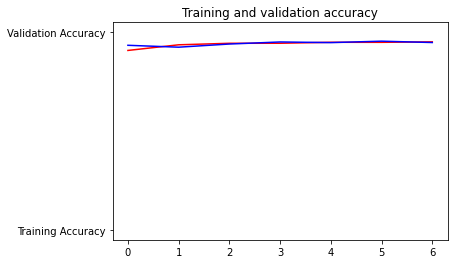

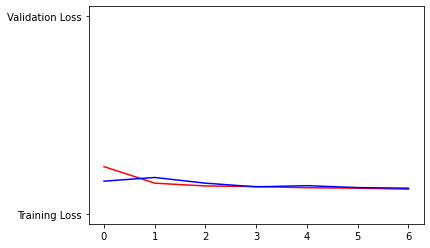

<Figure size 432x288 with 0 Axes>

In [56]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()